In [1]:
!pip install pyCalor

  Using cached pycalor-1.0.21-py3-none-any.whl.metadata (4.8 kB)
  Using cached coolprop-7.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (282 bytes)
  Using cached igraph-0.11.9-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
Using cached pycalor-1.0.21-py3-none-any.whl (24 kB)
Using cached coolprop-7.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.1 MB)
Using cached igraph-0.11.9-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.4 MB)
Using cached texttable-1.7.0-py2.py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pyCalor]m2/4 [igraph]p]


Problem 7-190 from Cengels Thermodynamics 9th Edition

Air enters a two-stage compressor at 100 kPa and 27°C and is compressed to 625 kPa. The pressure ratio across each stage is the same, and the air is cooled to the initial temperature between the two stages. 

- Assuming the compression process to be isentropic, determine the power input to the compressor for a mass flow rate of 0.15 kg/s.
- What would your answer be if only one stage of compression were used?



In [2]:
from pyCalor import thermo as th

In [3]:
substance = 'air'
mdot_kgPerS = 0.15

In [4]:
p1_Pa = 100e3
T1_C = 27
T1_K = T1_C +273.15

pressureRatio = 2.5

p2_Pa = p1_Pa * pressureRatio
p3_Pa = p2_Pa

T3_C = 27
T3_K = T3_C + 273.15

p4_Pa = p3_Pa * pressureRatio; print(p4_Pa)

625000.0


In [13]:
st1 = th.state(substance,T=(T1_C,'C'),p=(p1_Pa,'Pa'),name='1')
h1_JperKg = st1.h*1e3
s1_JperKgperK = st1.s*1e3

s2_JperKgperK = s1_JperKgperK

st2 = th.state(substance,s=(s2_JperKgperK,'J/kg K'),p=(p2_Pa,'Pa'),name='2')
h2_JperKg = st2.h*1e3
T2_K = st2.T

st3 = th.state(substance,T=(T3_C,'C'),p=(p3_Pa,'Pa'),name='3')
h3_JperKg = st3.h*1e3
s3_JperKgperK = st3.s*1e3

s4_JperKgperK = s3_JperKgperK
st4 = th.state(substance,s=(s4_JperKgperK,'J/kg K'),p=(p4_Pa,'Pa'),name='4')
h4_JperKg = st4.h*1e3
T4_K = st4.T

In [14]:
Wdot_W = mdot_kgPerS*((h2_JperKg - h1_JperKg)+(h4_JperKg - h3_JperKg))
Wdot_kW = Wdot_W/1000# ; print(Wdot_kW)
print('(a) Wdot_kW = {0:1.1f} kW.'.format(Wdot_kW))


(a) Wdot_kW = 27.1 kW.


Now we can see how much work we would have to do if we were to do the same process with a single compressor.

In [15]:
s2_JperKgperK_ = s1_JperKgperK
st2_ = th.state(substance,s=(s2_JperKgperK_,'J/kg K'),p=(p4_Pa,'Pa'),name='2_')

h2_JperKg_ = st2_.h*1e3
T2_K_ = st2_.T

In [16]:
Wdot_W_ = mdot_kgPerS*((h2_JperKg_ - h1_JperKg))
Wdot_kW_ = Wdot_W_/1000# ; print(Wdot_kW)
print('(b) Wdot_kW = {0:1.1f} kW.'.format(Wdot_kW_))

(b) Wdot_kW = 31.1 kW.


In [18]:
#import CoolProp
#from CoolProp.Plots import PropertyPlot

import numpy as np
import matplotlib.pyplot as plt

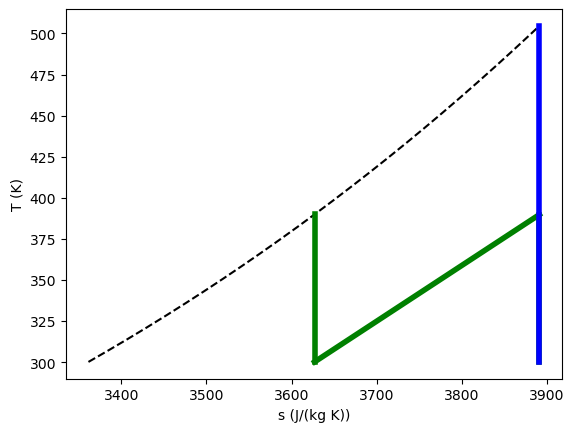

In [21]:
plt.figure()
plt.clf()
T = np.linspace(T1_K, T2_K_, 500) # range of temperatures
for P in [p4_Pa]: 
    air = [th.state(substance,T=(t,'K'), p=(P,'Pa')) for t in T]
    S = [s.s*1e3 for s in air]
    plt.plot(S, T, 'k--')
  
plt.xlabel('s (J/(kg K))')
plt.ylabel('T (K)')
# plt.savefig('carbonDioxideRefrigerationTS.png')

plt.plot([s1_JperKgperK, s2_JperKgperK], [T1_K, T2_K], 'g-', lw=4) # Process 1
plt.plot([s2_JperKgperK, s3_JperKgperK], [T2_K, T3_K], 'g-', lw=4) # Process 1
plt.plot([s3_JperKgperK, s4_JperKgperK], [T3_K, T4_K], 'g-', lw=4) # Process 1

plt.plot([s1_JperKgperK, s2_JperKgperK], [T1_K, T2_K_], 'b-', lw=4) # Process 2

# plt.savefig('multistageCompression.png', format='png')